import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

loading the data

In [2]:
data = pd.read_csv("/content/sample_data/student-mat.csv")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.shape

(395, 33)

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data.tail

<bound method NDFrame.tail of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
data.duplicated

<bound method DataFrame.duplicated of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famr

In [ ]:
data.nunique

<bound method DataFrame.nunique of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel 

In [ ]:
data.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [ ]:
data.describe

<bound method NDFrame.describe of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel f

In [ ]:
data.isnull().any()

G1           False
G2           False
G3           False
studytime    False
failures     False
absences     False
dtype: bool

In [15]:
data.corr()['G3'].sort_values()

<ipython-input-15-467e0ce402cd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['G3'].sort_values()


failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
freetime      0.011307
absences      0.034247
famrel        0.051363
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

plotting the graph

In [ ]:
import cufflinks as cf
cf.go_offline()

In [ ]:
data.iplot()

In [ ]:
data.iplot(kind='box')

In [ ]:
data['G3'].iplot(kind='hist',bins=100,color='blue')

<Axes: >

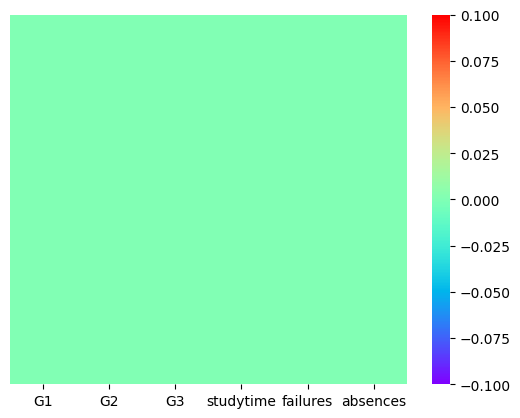

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(),cmap="rainbow",yticklabels=False)

<Axes: >

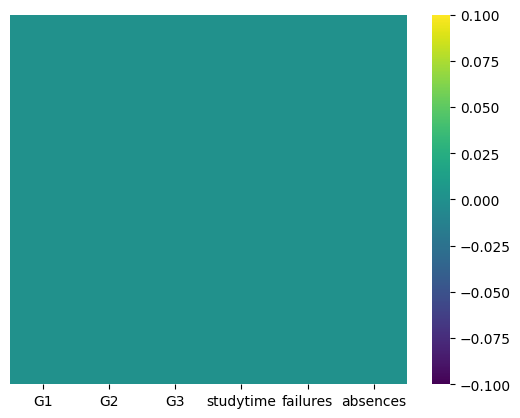

In [ ]:
import seaborn as sns
sns.heatmap(data.isnull(),cmap="viridis",yticklabels=False)

<Axes: ylabel='count'>

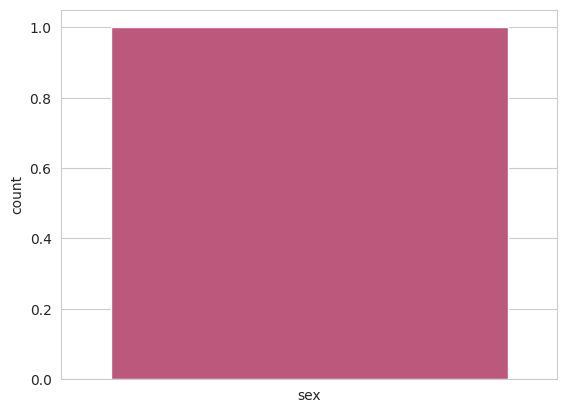

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x= ['sex'],data=data,palette='plasma')

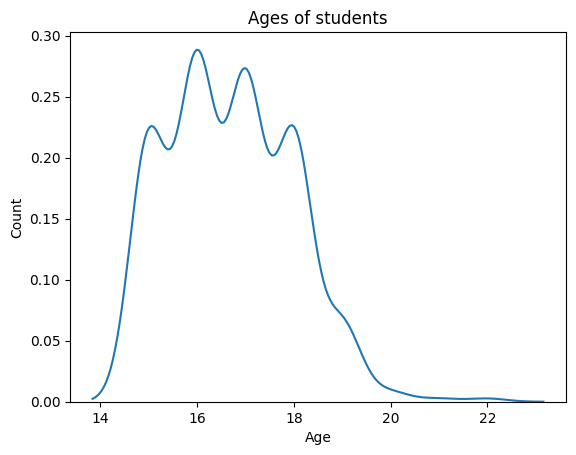

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
b = sns.kdeplot(data['age'])
b.axes.set_title('Ages of students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

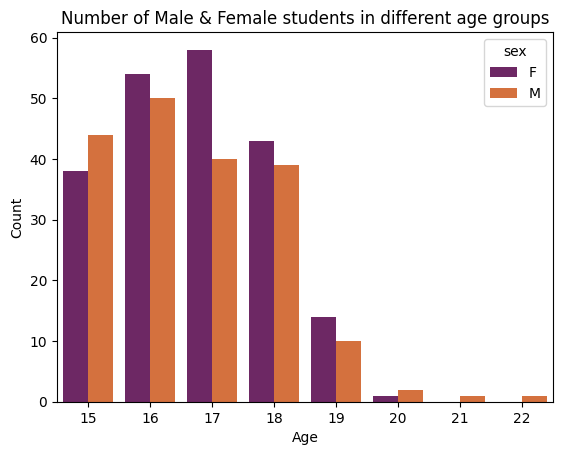

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
b = sns.countplot(x='age',hue='sex', data=data, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

In [9]:
u_data = len(data[data['address'] == 'U'])
print('Number of Urban students:',u_data)
r_data = len(data[data['address'] == 'R'])
print('Number of Rural students:',r_data)

Number of Urban students: 307
Number of Rural students: 88


<Axes: xlabel='address', ylabel='count'>

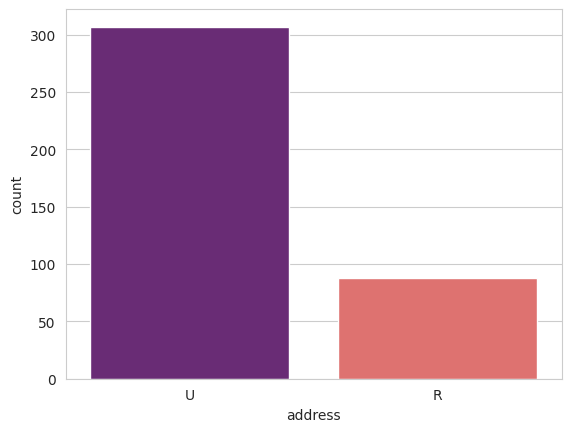

In [10]:
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='address',data=data,palette='magma')

<Axes: xlabel='address', ylabel='count'>

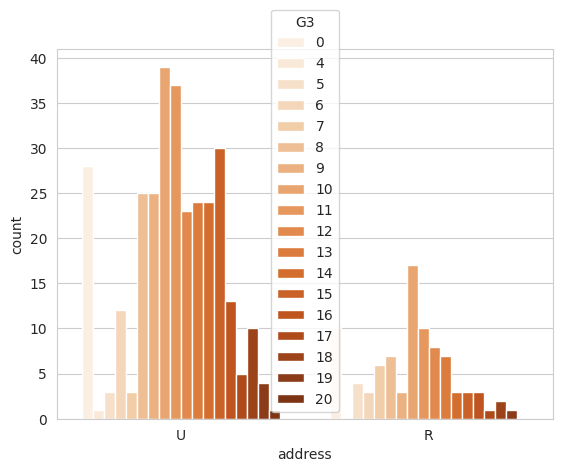

In [11]:
import seaborn as sns
sns.countplot(x='address',hue='G3',data=data,palette='Oranges')

Text(0.5, 1.0, 'Age vs Final Grade')

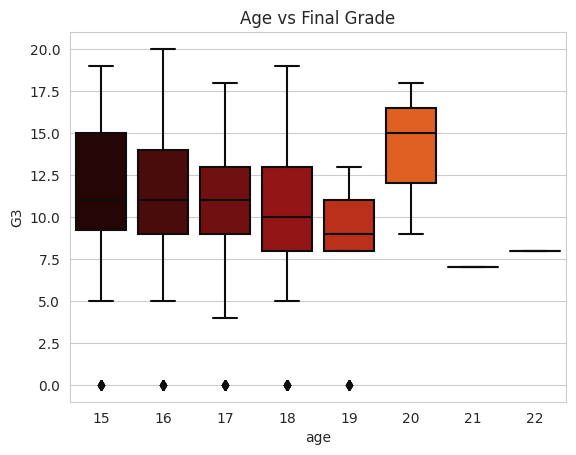

In [12]:
import seaborn as sns
b= sns.boxplot(x='age', y='G3',data=data,palette='gist_heat')
b.axes.set_title('Age vs Final Grade')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Does age affect final grade?')

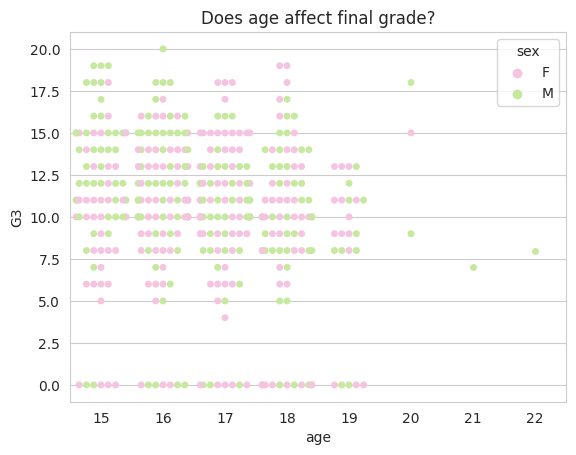

In [14]:
import seaborn as sns
b = sns.swarmplot(x='age', y='G3',hue='sex', data=data,palette='PiYG')
b.axes.set_title('Does age affect final grade?')

<ipython-input-13-147d84b8a75e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['address'] == 'U', 'G3'], label='Urban', shade = True)
<ipython-input-13-147d84b8a75e>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[data['address'] == 'R', 'G3'], label='Rural', shade = True)


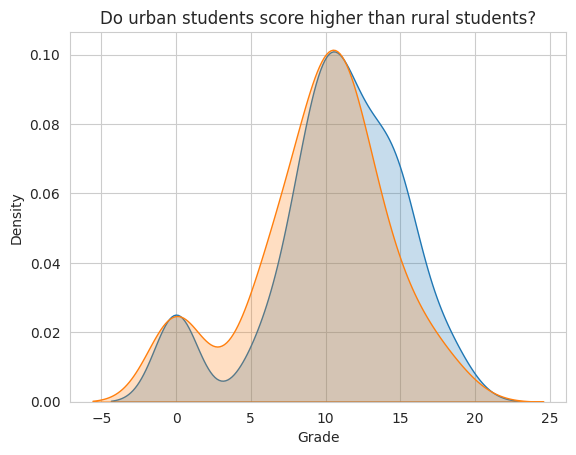

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data.loc[data['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(data.loc[data['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

In [ ]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"
x = np.array(data.drop([predict], 1))
y = np.array(data[predict])

<ipython-input-14-65ae61531c7e>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([predict], 1))


spliting the train test data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
xtrain

array([[ 7, 10,  2,  0,  6],
       [13, 15,  1,  0,  0],
       [ 7,  8,  2,  0,  0],
       ...,
       [13, 13,  3,  0,  0],
       [15, 14,  3,  0,  6],
       [ 6,  5,  3,  1,  0]])

In [ ]:
xtest

array([[ 7,  9,  2,  2,  6],
       [10, 10,  1,  0,  4],
       [11, 10,  3,  0,  4],
       [ 9, 10,  3,  0,  9],
       [10,  0,  2,  0,  0],
       [16, 15,  4,  0,  7],
       [10,  9,  3,  0,  4],
       [11, 10,  1,  0,  8],
       [ 9, 10,  2,  0,  4],
       [ 7,  9,  4,  0,  0],
       [16, 18,  2,  0,  0],
       [ 9,  9,  2,  0, 56],
       [14, 15,  2,  0,  2],
       [16, 16,  2,  0,  2],
       [17, 18,  1,  0,  0],
       [ 7,  6,  1,  0, 18],
       [15, 14,  2,  0,  2],
       [ 8,  0,  1,  0,  0],
       [10,  8,  1,  0,  6],
       [10, 13,  2,  1,  6],
       [ 7,  7,  3,  0,  6],
       [ 7,  7,  2,  3,  5],
       [ 8,  9,  2,  0,  8],
       [15, 15,  2,  0,  2],
       [15, 15,  2,  0,  2],
       [ 8,  9,  2,  0,  4],
       [15, 15,  2,  0,  0],
       [ 5,  6,  2,  0,  6],
       [16, 15,  2,  0,  2],
       [ 9, 10,  2,  0,  2],
       [ 8,  7,  2,  3,  8],
       [10, 11,  4,  0, 10],
       [ 9, 11,  2,  0,  0],
       [ 8,  7,  1,  1,  7],
       [12, 11

In [ ]:
ytrain

array([10, 15,  0,  9, 13,  9,  0,  9,  0, 11, 18, 15, 11, 10, 13,  8,  6,
       15, 14, 10, 15, 15, 11, 13, 18,  0, 13,  0, 10, 10, 17, 10, 12, 13,
        6,  8, 15, 11, 12, 19, 15, 15,  8,  5, 10, 14, 16,  0, 19,  8, 14,
       14, 13,  8,  8,  7,  8, 12, 16,  6,  9, 16,  0, 14, 11,  0, 10, 12,
       10, 12, 14, 13,  8, 13, 11,  0, 11,  0, 11, 13, 13,  6,  0, 18, 14,
       14, 19, 12, 11, 10, 10,  5,  0,  9,  0, 13, 11,  0, 16,  9, 12, 11,
       10, 11, 17,  0,  8, 10, 14, 14,  9, 11, 10, 10, 15, 13,  5, 15, 10,
       11, 20, 14,  8, 10, 12,  0,  7, 16,  6,  7, 10, 14, 17, 10, 15, 13,
       16, 13, 15,  9, 14, 11,  0, 18, 11, 15, 10, 16,  0, 11, 18, 17, 14,
       11,  6, 11, 11, 10, 10, 15,  9, 10, 10, 13, 16, 14, 14,  9,  0, 16,
        8, 10, 11, 13, 14, 12, 16, 12,  9, 15, 14, 18, 12,  8, 10, 12, 15,
        0, 11,  6, 11,  9, 11, 10, 11, 11, 10, 10, 18, 10,  0,  7, 13, 16,
       10,  8, 12,  8,  7,  6, 10,  5, 18, 12,  5,  9, 13,  8, 13, 11, 13,
       11, 12, 15, 13, 10

In [ ]:
ytest

array([ 8, 10, 10,  9,  0, 17,  9, 10, 10,  0, 18,  8, 15, 16, 18,  6, 14,
        0, 11, 13,  7,  7, 10, 14, 16, 10, 15,  6, 15, 10,  8, 11, 12,  8,
       11,  9, 10,  9, 12, 15,  7, 13, 15, 18,  0, 19, 10,  8,  8,  9,  8,
        0, 15, 12,  9, 15,  5,  9,  0, 10, 10,  9, 11, 10,  0, 15, 10, 15,
        9, 10, 11, 12, 15, 10, 12, 12, 11, 13,  9])

Modelling the data

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)
accuracy = linear_regression.score(xtest, ytest)
print(accuracy)

0.839393395472809


In [ ]:
predictions = linear_regression.predict(xtest)
for i in range(len(predictions)):
    print(predictions[x], xtest[x], [ytest[x]])

[[15.08564599  8.3751132   9.50437469  7.76626443  8.3751132 ]
 [15.08564599 15.08564599  9.50437469  7.76626443 -0.80336789]
 [10.0596169   9.48310556  9.50437469  9.50310338 18.24020139]
 ...
 [18.24020139  9.48310556  9.78262081  9.50310338  9.50310338]
 [10.67165565 15.04437903  9.78262081  7.76626443  7.76626443]
 [ 9.48310556  7.69167373  9.78262081  7.76626443 15.08564599]] [[[16 15  4  0  7]
  [10  9  3  0  4]
  [11 10  3  0  4]
  [ 7  9  2  2  6]
  [10  9  3  0  4]]

 [[16 15  4  0  7]
  [16 15  4  0  7]
  [11 10  3  0  4]
  [ 7  9  2  2  6]
  [10  0  2  0  0]]

 [[11 10  1  0  8]
  [ 9 10  2  0  4]
  [11 10  3  0  4]
  [ 9 10  3  0  9]
  [16 18  2  0  0]]

 ...

 [[16 18  2  0  0]
  [ 9 10  2  0  4]
  [10 10  1  0  4]
  [ 9 10  3  0  9]
  [ 9 10  3  0  9]]

 [[ 9  9  2  0 56]
  [14 15  2  0  2]
  [10 10  1  0  4]
  [ 7  9  2  2  6]
  [ 7  9  2  2  6]]

 [[ 9 10  2  0  4]
  [ 7  9  4  0  0]
  [10 10  1  0  4]
  [ 7  9  2  2  6]
  [16 15  4  0  7]]] [array([[17,  9, 10,  8,  9]

Machine learning Algorithms

In [16]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [18]:
# splitting the data into training and testing data (75% and 25%)
X_train, X_test, y_train, y_test = train_test_split(data, data['G3'], test_size = 0.25, random_state=42)

In [20]:
X_train.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
16      GP   F   16       U     GT3       T     4     4  services  services   
66      GP   M   15       U     GT3       A     4     4     other  services   
211     GP   M   17       U     LE3       T     4     4  services     other   
7       GP   F   17       U     GT3       A     4     4     other   teacher   
19      GP   M   16       U     LE3       T     4     3    health     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
71      GP   M   15       U     GT3       T     4     2     other     other   
106     GP   F   15       U     GT3       T     2     2     other     other   
270     GP   F   19       U     GT3       T     3     3     other  services   
348     GP   F   17       U     GT3       T     4     3    health     other   
102     GP   M   15       U     GT3       T     4     4  services     other   

     ... famrel freet

MAE - Mean Absolute Error & RMSE - Root Mean Square Error

In [21]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [22]:
# find the median
median_pred = X_train['G3'].median()

# create a list with all values as median
median_preds = [median_pred for _ in range(len(X_test))]

# store the true G3 values for passing into the function
true = X_test['G3']

In [23]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 3.7879
Median Baseline RMSE: 4.8252


In [24]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop('G3', axis='columns')
    X_test = X_test.drop('G3', axis='columns')

    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)

    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results